In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [4]:
#Load the data
data=pd.read_csv("../AEMO/Vic_Demand.csv")

In [5]:
data

,Unnamed: 0,Year,Month_int,Day_int,Hour_int,Minute_int,TOTALDEMAND
0,1197,1998,12,7,2,0,2239.46200
1,1198,1998,12,7,2,30,3635.37667
2,1199,1998,12,7,3,0,3535.43333
3,1200,1998,12,7,3,30,3394.22167
4,1201,1998,12,7,4,0,3287.52500
...,...,...,...,...,...,...,...
382010,1794284,2020,9,20,22,0,3997.91000
382011,1794285,2020,9,20,22,30,3901.60000
382012,1794286,2020,9,20,23,0,3866.55000
382013,1794287,2020,9,20,23,30,4080.50000


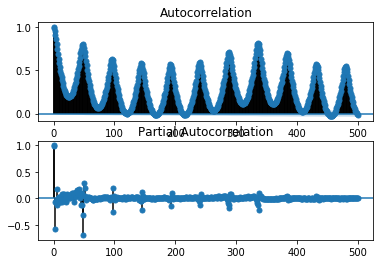

In [7]:
#Build the AC and PAC graph for all the data
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(data.TOTALDEMAND, lags=500, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(data.TOTALDEMAND, lags=500, ax=ax[1])
plt.show()

In [8]:
#Subset the data for a single time
test=data[(data["Hour_int"]==9)&(data["Minute_int"]==30)]

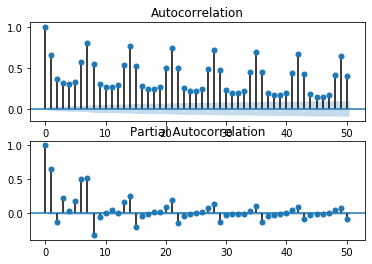

In [15]:
#Build the AC and PAC graphs for the single time
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(test.TOTALDEMAND, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(test.TOTALDEMAND, lags=50, ax=ax[1])
plt.show()

C:\Users\Marly\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Marly\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Optimization terminated successfully.
         Current function value: 7.318639
         Iterations: 2
         Function evaluations: 70


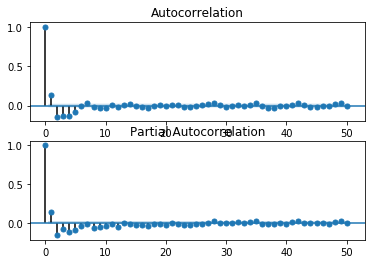

In [17]:
model = sm.tsa.statespace.SARIMAX(test.TOTALDEMAND, order=(0,1,1),seasonal_order=(0,1,1,7)).fit(max_iter=50, method='powell')
res = model.resid
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()